# WeatherPy
## Data Analysis
### Matthew Stewart - March 31, 2019
---

### Analysis
* To no one's surprise (hopefully), temperature does indeed increase as one approaches the equator.  In addition, given the time of year, we would expect the Southern Hemisphere to exhibit  warmer temperatures than the Northern Hemisphere.  This is, in fact, what we see.
* Overall, there does not appear to be a strong relationship between humidity and latitude.  However, there does appear to be a cluster of cities between latitudes of -20 and 20 that have 100% humidity.  This makes sense given that the world's tropical rainforests lie between the Tropic of Capricorn (23.5 degrees south) and the Tropic of Cancer (23.5 degrees north).
* There do not appear to be strong relationships between latitude and either wind speed or cloud cover.

### Initial Setup

In [9]:
# Dependencies
import random
from citipy import citipy
from openweathermapy import core as owm
import time
import pandas as pd
from matplotlib import pyplot as plt

# API Key
from config import api_key

---

### Generate List of Cities
This section will generate a list of 750 cities using the python citipy library.  750 is a randomly chosen number.  When passing these 750 cities as requests to the open weather map API, not all of them will be found.  The idea is that, after all requests have been made, we will have resulting weather data for at least 500 cities.  
  
  
_Note: latitudes must be in the range of -90 to 90; longitudes must be in the range of -180 to 180._

In [10]:
# Initialize variables to hold lists of cities and the random latitudes/longitudes
# that were used to generate these cities
cities = []
random_latitudes = []
random_longitudes = []

# Generate list of cities
while len(cities) < 750:
    
    # Generate single city
    latitude = random.uniform(-90, 90)
    longitude = random.uniform(-180, 180)
    resulting_city = citipy.nearest_city(latitude, longitude)
    
    # Append to list of cities and lat/lng if not already in the list of cities
    if resulting_city.city_name.title() not in cities:
        cities.append(resulting_city.city_name.title())
        random_latitudes.append(latitude)
        random_longitudes.append(longitude)

In [11]:
# Convert resulting data to dataframe
cities_df = pd.DataFrame({
    'Nearest City': cities,
    'Random Latitude': random_latitudes,
    'Random Longitude': random_longitudes
})
cities_df.head()

,Nearest City,Random Latitude,Random Longitude
0,Gigmoto,18.436596,131.596804
1,Atuona,-9.419470,-127.463471
2,Pimentel,-10.919506,-87.026358
3,Christchurch,-49.384314,178.127211
4,Lagoa,41.811988,-27.831089


In [12]:
# Check that there are 750 unique (non-duplicate cities)
print(cities_df['Nearest City'].nunique())

750


---

### Make API Requests
This section will pass the list of 750 cities as requests to the open weather map API.  Note the following:
* If the city is not in the open weather map API, the request will generate an error.  We will use try, except to skip these requests.
* Using a free open weather map account, we are limited to 60 requests per minute.

In [13]:
# Initialize empty list to store the resulting data from our API requests
city_weather_data = []

# Initialize variables for use in tracking the API requests in our print log
record_count = 1 
set_count = 1

# Define parameters for the API request
params = {
    'units': 'imperial', # for temperatures in Fahrenheit ('metric' for Celsius)
    'appid': api_key
}

# API Requests
print('''
---------------------------------
Beginning Data Retrieval
---------------------------------
''')

for city in cities:
    
    # Process 60 requests at a time, then pause for 60 seconds.  Increment set_count and restart record_count
    if (cities.index(city) % 60 == 0) and (cities.index(city) > 59):
        time.sleep(60)
        set_count += 1
        record_count = 1
    
    # Make API request and track in the print log
    # Use (try, except) to avoid crashing when a city input is not found in the open weather map API
    try:
        city_weather_data.append(owm.get_current(city, **params))        
        print(f'Retrieving data for Record {record_count} in Set {set_count}: {city}')
        record_count += 1
    except:
        print(f'City of {city} not found - skipping record')

print('''
---------------------------------
Data Retrieval Complete
---------------------------------
''')


---------------------------------
Beginning Data Retrieval
---------------------------------

Retrieving data for Record 1 in Set 1: Gigmoto
Retrieving data for Record 2 in Set 1: Atuona
Retrieving data for Record 3 in Set 1: Pimentel
Retrieving data for Record 4 in Set 1: Christchurch
Retrieving data for Record 5 in Set 1: Lagoa
City of Taolanaro not found - skipping record
City of Tsihombe not found - skipping record
Retrieving data for Record 6 in Set 1: Ilulissat
Retrieving data for Record 7 in Set 1: Ushuaia
Retrieving data for Record 8 in Set 1: New Norfolk
Retrieving data for Record 9 in Set 1: Pevek
Retrieving data for Record 10 in Set 1: Esperance
Retrieving data for Record 11 in Set 1: Tuktoyaktuk
Retrieving data for Record 12 in Set 1: Bluff
Retrieving data for Record 13 in Set 1: Punta Arenas
Retrieving data for Record 14 in Set 1: Visby
City of Barentsburg not found - skipping record
Retrieving data for Record 15 in Set 1: Castro
Retrieving data for Record 16 in Set 1: Ka

City of Rungata not found - skipping record
Retrieving data for Record 43 in Set 3: Bhachau
Retrieving data for Record 44 in Set 3: Kavieng
City of Tatarastii De Jos not found - skipping record
City of Tuggurt not found - skipping record
Retrieving data for Record 45 in Set 3: Hermanus
Retrieving data for Record 46 in Set 3: Sayyan
City of Grajau not found - skipping record
Retrieving data for Record 47 in Set 3: Gualaquiza
Retrieving data for Record 48 in Set 3: Saskylakh
Retrieving data for Record 49 in Set 3: Mutis
Retrieving data for Record 50 in Set 3: Ferme-Neuve
Retrieving data for Record 1 in Set 4: Dongsheng
City of Saint Combs not found - skipping record
Retrieving data for Record 2 in Set 4: Biala Podlaska
Retrieving data for Record 3 in Set 4: Uruzgan
Retrieving data for Record 4 in Set 4: Roald
Retrieving data for Record 5 in Set 4: Pangnirtung
Retrieving data for Record 6 in Set 4: Berlevag
Retrieving data for Record 7 in Set 4: Port Elizabeth
Retrieving data for Record 8

Retrieving data for Record 36 in Set 6: Springbok
City of Shcholkine not found - skipping record
City of Burica not found - skipping record
Retrieving data for Record 37 in Set 6: Pacific Grove
Retrieving data for Record 38 in Set 6: Havoysund
Retrieving data for Record 39 in Set 6: Antofagasta
Retrieving data for Record 40 in Set 6: Luz
Retrieving data for Record 41 in Set 6: Severo-Kurilsk
Retrieving data for Record 42 in Set 6: Tiznit
Retrieving data for Record 43 in Set 6: Rio Grande
Retrieving data for Record 44 in Set 6: Dumingag
Retrieving data for Record 45 in Set 6: Coolum Beach
Retrieving data for Record 46 in Set 6: Hasaki
City of Bac Can not found - skipping record
Retrieving data for Record 47 in Set 6: Cedar City
Retrieving data for Record 48 in Set 6: Katsuura
Retrieving data for Record 49 in Set 6: Orlik
Retrieving data for Record 50 in Set 6: Maragogi
Retrieving data for Record 51 in Set 6: Morondava
Retrieving data for Record 52 in Set 6: Kandrian
Retrieving data for 

Retrieving data for Record 26 in Set 9: Khuzhir
Retrieving data for Record 27 in Set 9: Mandurah
Retrieving data for Record 28 in Set 9: Kieta
Retrieving data for Record 29 in Set 9: Carutapera
Retrieving data for Record 30 in Set 9: Mahmudia
Retrieving data for Record 31 in Set 9: Kinkala
Retrieving data for Record 32 in Set 9: Peace River
Retrieving data for Record 33 in Set 9: Tenenkou
Retrieving data for Record 34 in Set 9: Concepcion Del Oro
Retrieving data for Record 35 in Set 9: Hokitika
Retrieving data for Record 36 in Set 9: Houma
Retrieving data for Record 37 in Set 9: Lorengau
Retrieving data for Record 38 in Set 9: Sukumo
Retrieving data for Record 39 in Set 9: Port Hedland
Retrieving data for Record 40 in Set 9: Kisangani
Retrieving data for Record 41 in Set 9: Besancon
Retrieving data for Record 42 in Set 9: Ulaanbaatar
Retrieving data for Record 43 in Set 9: Abay
Retrieving data for Record 44 in Set 9: Touros
Retrieving data for Record 45 in Set 9: Muhos
Retrieving data 

Retrieving data for Record 11 in Set 12: Gravelbourg
Retrieving data for Record 12 in Set 12: Formosa
Retrieving data for Record 13 in Set 12: Keelung
Retrieving data for Record 14 in Set 12: Amapa
Retrieving data for Record 15 in Set 12: Samfya
Retrieving data for Record 16 in Set 12: Makakilo City
Retrieving data for Record 17 in Set 12: Serebryansk
Retrieving data for Record 18 in Set 12: Santiago Del Estero
Retrieving data for Record 19 in Set 12: Moroni
Retrieving data for Record 20 in Set 12: Ekhabi
Retrieving data for Record 21 in Set 12: Meadow Lake
Retrieving data for Record 22 in Set 12: Ejea De Los Caballeros
Retrieving data for Record 23 in Set 12: Galle
Retrieving data for Record 24 in Set 12: Norrtalje
Retrieving data for Record 25 in Set 12: Lillooet
Retrieving data for Record 26 in Set 12: Salcia
Retrieving data for Record 27 in Set 12: Tendo
Retrieving data for Record 28 in Set 12: Lewistown
Retrieving data for Record 29 in Set 12: Eureka
Retrieving data for Record 30 

In [14]:
# Make sure our API Requests returned at least 500 cities
print(len(city_weather_data))

681


---

### Convert Raw Data to Dataframe
This section will take the raw data returned from the above API requests and store it in a dataframe.
The data we want to extract from the raw data is:
1. City
2. Country
3. Latitude
4. Longitude
5. Date/Time
6. Temperature (F)
7. Humidity (%)
8. Wind Speed (mph)
9. Cloud Cover (%)

In [16]:
# Define summary list that will be used in the function call that will extract the desired data
summary = [
    'name',
    'sys.country',
    'coord.lat',
    'coord.lon',
    'dt',
    'main.temp',
    'main.humidity',
    'wind.speed',
    'clouds.all'
]

# Store extracted data in list of tuples
extracted_weather_data = []
for index in range(len(city_weather_data)):
    extracted_weather_data.append(city_weather_data[index](*summary))

extracted_weather_data[:5]

[('Gigmoto', 'PH', 13.78, 124.39, 1554052222, 74.77, 100, 7.4, 8),
 ('Atuona', 'PF', -9.8, -139.03, 1554052131, 81.52, 100, 13, 68),
 ('Pimentel', 'BR', -3.7, -45.5, 1554052222, 85.03, 79, 3.71, 56),
 ('Christchurch', 'NZ', -43.53, 172.64, 1554052058, 63.61, 72, 19.46, 92),
 ('Lagoa', 'PT', 37.14, -8.45, 1554051734, 62.15, 77, 4.7, 75)]

In [22]:
# Convert list of tuples to dataframe
extracted_weather_data_df = pd.DataFrame(extracted_weather_data, columns = [
    'City',
    'Country',
    'Latitude',
    'Longitude',
    'Date/Time',
    'Temperature (F)',
    'Humidity (%)',
    'Wind Speed (mph)',
    'Cloud Cover (%)'
])

# Convert Date/Time values from Unix timestamp to more readable values
extracted_weather_data_df['Date/Time'] = extracted_weather_data_df['Date/Time'].apply(lambda x: time.ctime(x))

# Display first five rows
extracted_weather_data_df.head()

,City,Country,Latitude,Longitude,Date/Time,Temperature (F),Humidity (%),Wind Speed (mph),Cloud Cover (%)
0,Gigmoto,PH,13.78,124.39,Sun Mar 31 11:10:22 2019,74.77,100,7.40,8
1,Atuona,PF,-9.80,-139.03,Sun Mar 31 11:08:51 2019,81.52,100,13.00,68
2,Pimentel,BR,-3.70,-45.50,Sun Mar 31 11:10:22 2019,85.03,79,3.71,56
3,Christchurch,NZ,-43.53,172.64,Sun Mar 31 11:07:38 2019,63.61,72,19.46,92
4,Lagoa,PT,37.14,-8.45,Sun Mar 31 11:02:14 2019,62.15,77,4.70,75


In [67]:
# Export dataframe to .csv
extracted_weather_data_df.to_csv('Output/Weather_Data.csv', index = False)

---

### Plot Data
This section takes the data from the above dataframe and plots the following:
1. Temperature vs. Latitude
2. Humidity vs. Latitude
3. Wind Speed vs. Latitude
4. Cloud Cover vs. Latitude

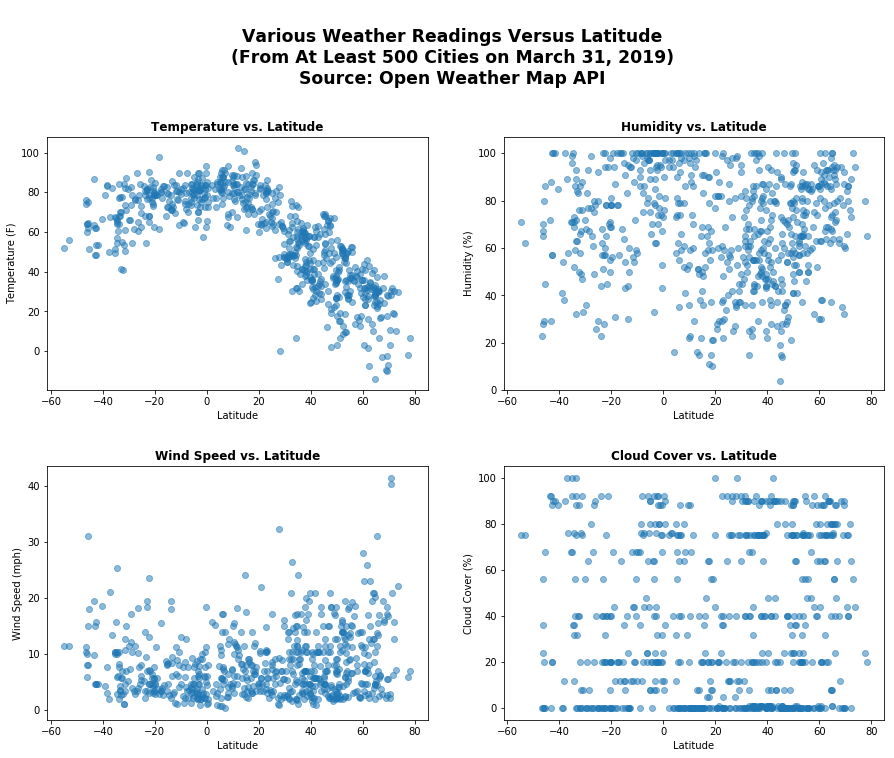

In [81]:
# Generate single figure that will contain all plots;
# include an over-arching, primary title
plt.figure(figsize = (15, 12))
plt.suptitle('''
Various Weather Readings Versus Latitude
(From At Least 500 Cities on March 31, 2019)
Source: Open Weather Map API
''', y = 0.95, fontsize = 'xx-large', fontweight = 'bold')

# x_axis is always latitude
x_axis = extracted_weather_data_df['Latitude']

# plot in upper-left - temperature vs. latitude
plt.subplot(2, 2, 1)
plt.scatter(x = x_axis, y = extracted_weather_data_df['Temperature (F)'], alpha = 0.5)
plt.title('Temperature vs. Latitude', fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

# plot in upper-right - humidity vs. latitude
plt.subplot(2, 2, 2)
plt.scatter(x = x_axis, y = extracted_weather_data_df['Humidity (%)'], alpha = 0.5)
plt.ylim(0, 107)
plt.title('Humidity vs. Latitude', fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# plot in lower-left - wind speed vs. latitude
plt.subplot(2, 2, 3)
plt.scatter(x = x_axis, y = extracted_weather_data_df['Wind Speed (mph)'], alpha = 0.5)
plt.title('Wind Speed vs. Latitude', fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# plot in lower-right - cloud cover vs. latitude
plt.subplot(2, 2, 4)
plt.scatter(x = x_axis, y = extracted_weather_data_df['Cloud Cover (%)'], alpha = 0.5)
plt.title('Cloud Cover vs. Latitude', fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')

# adjust margins
plt.subplots_adjust(hspace = 0.3, top = 0.8)

# output
plt.savefig('Output/DataPlots.png')
plt.show()